<a href="https://colab.research.google.com/github/pgs2285/BigData_Analysis_License/blob/master/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC_%EC%8B%A4%EA%B8%B0_3%EC%9C%A0%ED%98%95_%EC%A4%80%EB%B9%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빅데이터 분석기사 실기 3유형 준비
올해부터 새로히 생긴 유형이다.  
이론적인 내용보다는 DataManim의 사이트에서 예시 위주로 준비했다.  
[DataManim의 사이트](https://www.datamanim.com/)

## 정규성 검증

### Shapiro & Wilk 검증
shapiro 와 wilk라는 사람에 의해 만들어진 검증과정이다.
(여기서 정규성은 정규분포를 따르냐에 대한 여부)
p-value가 0.05 이상이면 귀무가설 채택(정규성을 따른다)
p-value가 0.05 이하라면 대립가설 채택(정규성을 따르지 않는다)

여기서 0.05 는 alpha level로 일반적으로 0.05(확률이 95% 이상이다)를 채택하나, 타 값이 올수도 있다.

In [ ]:
# 1. 다음 데이터의 정규성을 검증하라

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
# plt.hist(df)
# plt.show()

from scipy.stats import shapiro
shapiro(df)
# 샤피로 검증시 p-value가 0.34이므로, 유의수준 5%에서 귀무가설("데이터는 검증성을 가진다")를 기각할 수 없다.


ShapiroResult(statistic=0.9981444478034973, pvalue=0.34849318861961365)

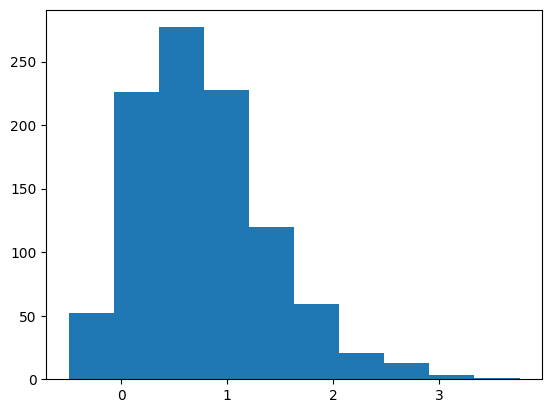

2.309641794969743e-16


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

from scipy.stats import shapiro
print(shapiro(df).pvalue)
# 샤피로 검증시 p-value 가 2.3e-16 이므로 유의수준 5%에서 "데이터는 정규성을 가진다를 기각하고, 대립가설을 채택한다"
# 데이터는 정규성을 가지지 않는다
# print(help(shapiro))

In [ ]:
#다음 데이터를 로그 변환후 정규성을 가지는지 확인하라.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_y_data = np.log1p(df) # 0값이 포함된 것에 로그변환을 하려면 log1p를 사용한다 (1+을 해주고 로그변환)

# plt.hist(log_y_data)
# plt.show()

from scipy.stats import shapiro
print(shapiro(log_y_data).pvalue)
# shapiro검증시 pvalue가 0.17이 나온다. 이 경우 귀무가설을 채택한다(정규성을 보인다)

0.17540602385997772


In [ ]:
# 다음 데이터의 정규성을 검증하라
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
# plt.hist(df)
# plt.show()

# from scipy.stats import shapiro
# shapiro(df)   # shapiro 검증에 의하면 p-value는 0.15 로 기준값인 0.05(or 0.01) 보다 높아 정규성을 보인다 할 수 있다.
              # 하지만, 표본이 5000개가 넘어가는 경우에는 샤피론 검증은 정확하지 않을 수 있다.
from scipy.stats import anderson
print(anderson(df["data"].values))

'''
significance_level는 유의 확률값을 나타내며 critical_values는 각 유의 확률값의 기준점이 된다.
5%유의 수준에서 검정을 진행하려면 statistic값인 0.82이 significance_level 이 5.에 위치한 인덱스를
critical_values값에서 비교하면 된다. 그 값은 0.786이므로 이보다 큰 0.82을 가지므로
귀무가설을 기각하고 대립가설을 채택한다 -> 데이터는 정규성을 가지지 않는다고 판단한다.
'''

AndersonResult(statistic=0.8266993530405671, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=299.95980319533163, scale=5.031806887885131)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


### 단일 표본 t-검정
특정한 평균을 기준으로 해당 평균의 표본이 같은지를 검정하는 것.

보통 정규성을 만족하면 단일표본검정,  
정규성을 만족하지 않으면 윌콕슨 부호순위 검정을 실시한다.

In [ ]:

# 100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
# 그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
from scipy.stats import ttest_1samp, shapiro, wilcoxon

shapiro_pvalue = shapiro(df).pvalue
if shapiro_pvalue >= 0.05 :
  print("이 표본은 정규성을 띈다, 즉 단일 표본 t 검정을 실시한다.")
  print('단일표본 t-test의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다')
  static, pvalue = ttest_1samp(df["height"],165)
  print("t-검정의 pvalue값은 : ",pvalue)
else :
  print("이 표본은 정규성을 띄지 않는다.윌콕슨 부호순위 검정을 실시한다.")
  print('윌콕슨 순위 부호 검정의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다')
  static, pvalue = wilcoxon(df["height"]-165)

이 표본은 정규성을 띈다, 즉 단일 표본 t 검정을 실시한다.
단일표본 t-test의 귀무가설은 "100명 키의 평균은 165이다." 이며 대립가설은 "100명 키의 평균은 165가 아니다." 이다
t-검정의 pvalue값은 :  0.0018367171548080209


### 등분산 검정
두 정규성을 만족하는 데이터에서 생성된 두 개의 데이터 집합으로부터 두 정규분포의 모분산이 같은지 확인하기 위한 검정이다.  
scipy의 stats에서 이를 위한 bartlett, fligner, levene명령을 제공한다.


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene
a = df[df["class"] == 'A'].score
b = df[df["class"] == 'B'].score

print(bartlett(a,b))
print(fligner(a,b,center='median'))
print(fligner(a,b,center='mean'))
print(levene(a,b,center='median'))
print(levene(a,b,center='mean'))

# Bartlett’s test : 비 정규성에 민감하기 때문에 정규성을 따를때에만 사용한다
# levene's test : 정규성에 상관없이 연속적인 분포로 데이터를 구했을때 사용한다.

# 등분산검정의 방법은 3가지가 있다. pvalue값은 5% 유의수준이라면 0.05보다 작은 경우 "각 그룹은 등분산이다"라는 귀무가설을 기각한다
# 아래의 결과를 보면 모두 0.05보다 크므로 귀무가설을 기각할수 없음을 알 수 있다.

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
FlignerResult(statistic=0.8272211734319945, pvalue=0.36307728836821906)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)
LeveneResult(statistic=0.5086970687685527, pvalue=0.4760514837800255)


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')

from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

print(bartlett(df.A, df.B))
print(fligner(df.A, df.B))
print(levene(df.A, df.B))

from scipy.stats import shapiro
print(shapiro(df.A), shapiro(df.B))  # 둘다 정규성을 만족하지 않으므로, levene를 선택하는게 옳을듯?

#BartlettResult로는 등분산을 띄지만
#LeveneResult로는 등분산을 띄지 않는다

BartlettResult(statistic=2.3832178811043527, pvalue=0.12264468401745829)
FlignerResult(statistic=5.124831619122788, pvalue=0.023585858890699054)
LeveneResult(statistic=5.147914610463281, pvalue=0.023868975493455683)
ShapiroResult(statistic=0.964852511882782, pvalue=0.00016999404761008918) ShapiroResult(statistic=0.9371628165245056, pvalue=4.4986816760683723e-07)


### 독립표본검정
두 집단의 평균 비교이다.

* 데이터가 정규성을 가지는 경우(모수적 검정)
두 집단의 등분산 검정을 한 후  
  - ```python
  from scipy.stats import ttest_ind
    ttest_ind(df1,df2,equal_var=<등분산 True/False>)
    ```

* 데이터가 정규성을 가지지 않는 경우(비모수적 검정)

세부 내용은 아래 예시 참조.

In [ ]:
#두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')

from scipy.stats import bartlett,levene
print(bartlett(df1["data"], df2["data"]))   #
print(levene(df1["data"], df2["data"]))
from scipy.stats import ttest_ind
import numpy as np
print(ttest_ind(df1["data"], df2["data"],equal_var = True))
#pvalue 가 0.006 이므로 귀무가설(각 그룹의 평균은 동일하다) 를 기각하고 대립가설을 채택한다

BartlettResult(statistic=4.170597307474754, pvalue=0.04113129672708929)
LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)
TtestResult(statistic=2.7671907368517195, pvalue=0.00619015106792926, df=198.0)


In [ ]:
#두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

from scipy.stats import shapiro


print(shapiro(df["B"].dropna()))
print(shapiro(df["A"]))
# 두가지 모두 정규성을 띄지 않으므로 비모수 검정을 실행한다.
from scipy.stats import mannwhitneyu, ranksums

print(mannwhitneyu(df['A'],df['B'].dropna()))
print(ranksums(df['A'],df['B'].dropna()))
# Mann-Whitney U Test 검정 결과 pvalue는 0.49값으로 귀무가설(평균은같다)를 기각 할 수 없다. 두그룹의 평균은 동일하다 말할 수 있다.
# 윌콕슨 순위합 검정(ranksums)으로 확인 해봐도 같은 결과가 나온다.


ShapiroResult(statistic=0.9639433026313782, pvalue=0.00013568344002123922)
ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10)
MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)
300


### 대응표본 t검정
두 검정의 차이를 보고자할때 사용한다.
즉 동일한 집단의 '사전' 과 '사후'의 차이를 보고자 할때 사용한다.

In [ ]:
#특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')

from scipy.stats import shapiro

print(df.head())

before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))

from scipy.stats import levene
print()
print(levene(before,after))


from scipy.stats import ttest_rel
print(ttest_rel(before,after))


# 정규성 가짐 , 등분산성 가짐 -> 대응표본의 경우 등분산성이 파라미터에 영향을 주지않음,
# 대응표본 t 검정 결과 pvalue는 0.01로 유의수준 5%내에서 귀무가설을 기각한다 (전 후 평균은 같지 않다)

       before       after
0  216.289726  175.897620
1  190.279454  189.295934
2  217.744689  219.233935
3  235.021264  195.021021
4  234.098484  213.218227
ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)

LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)
TtestResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513, df=119)


# 카이제곱 검정
일원 카이제곱검정 (chisquare , 카이제곱 적합도 검정)
한 개의 요인에 의해 k개의 범주를 가질때 이론적 분포를 따르는지 검정
이원 카이제곱검정 (chi2_contingency ,fisher_exact(빈도수 5개 이하 셀이 20% 이상일때) , 카이제곱독립검정)
모집단이 두개의 변수에 의해 범주화 되었을 때, 두 변수들 사이의 관계가 독립인지 아닌지 검정

In [ ]:
#144회 주사위를 던졌을때, 각 눈금별로 나온 횟수를 나타낸다. 이 데이터는 주사위의 분포에서 나올 가능성이 있는지 검정하라

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

print(df.head())
from scipy.stats import chisquare
# 기대값 뽑기
expectedValue = (df["counts"].sum())/6
chisquare(df.counts,expectedValue)

   dice_number  counts
0            1      24
1            2      20
2            3      28
3            4      22
4            5      28


Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)

In [ ]:
#다음 데이터는 어떤 집단의 왼손잡이, 오른손 잡이의 숫자를 나타낸다. 인간의 왼손잡이와 오른손잡이의 비율을 0.2:0.8로 알려져있다.이 집단에서 왼손과 오른손 잡이의 비율이 적합한지 검정하라

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')

target = df.hands.value_counts().to_frame()
target['expected'] = [int(target.hands.sum()*0.8),int(target.hands.sum()*0.2)]

from scipy.stats import chisquare
print(chisquare(target.hands,target.expected))
## p-value는 0.02로 유의수준 5%이내에서 귀무가설을 기각하고 대립가설을 채택한다

Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468325)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C
